## Sales Prediction

# Obtain Data

importing libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Reading csv file

In [6]:
sales=pd.read_csv('advertising.csv')
sales.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


# Data analyzation

In [7]:
sales.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [8]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
sales.shape

(200, 4)

In [10]:
sales.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [11]:
sales.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

# Data Visualization

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


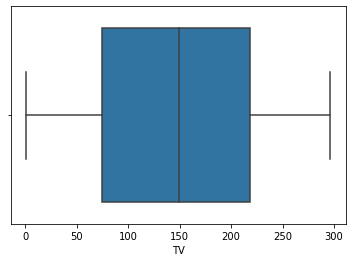

In [12]:
sns.boxplot(sales['TV'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


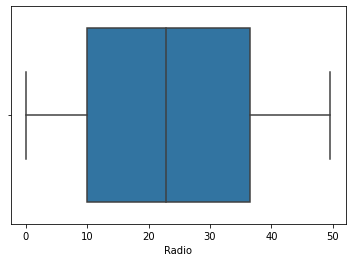

In [13]:
sns.boxplot(sales['Radio'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


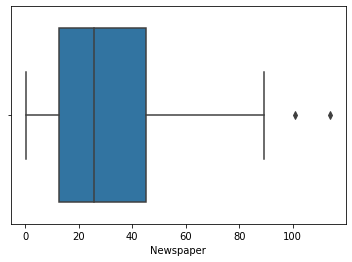

In [14]:
sns.boxplot(sales['Newspaper'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


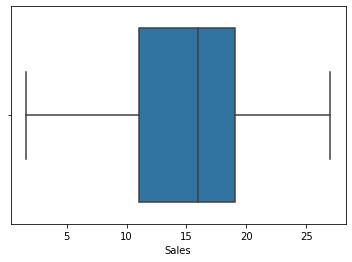

In [15]:
sns.boxplot(sales['Sales'])

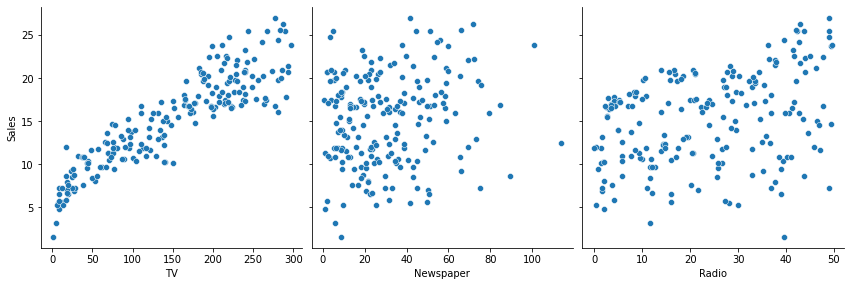

In [16]:
sns.pairplot(sales,x_vars=['TV','Newspaper','Radio'],y_vars='Sales',height=4,kind='scatter')

In [17]:
sales.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


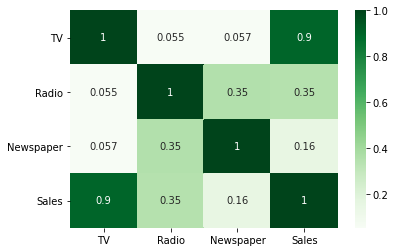

In [18]:
sns.heatmap(sales.corr(),cmap='Greens',annot=True)

# Training data

In [19]:
x=sales['TV']

In [20]:
y=sales['Sales']

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,test_size=0.3,random_state=122)

In [22]:
x_train.head()

33     265.6
116    139.2
99     135.2
100    222.4
56       7.3
Name: TV, dtype: float64

In [23]:
val=sm.add_constant(x_train)

In [24]:
rline=sm.OLS(y_train,val).fit()

In [25]:
rline.params

const    7.005274
TV       0.056317
dtype: float64

In [26]:
rline.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     670.4
Date:                Sat, 03 Jul 2021   Prob (F-statistic):           7.88e-55
Time:                        11:22:15   Log-Likelihood:                -304.43
No. Observations:                 140   AIC:                             612.9
Df Residuals:                     138   BIC:                             618.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0053      0.368     19.028      0.000       6.277       7.733
TV             0.0563      0.002     25.892      0.000       0.052       0.061
==============================================================================
Omnibus:                        1.742   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.419   Jarque-Bera (JB):                1.714
Skew:                           0.192   Prob(JB):                        0.424
Kurtosis:                       2.618   Cond. No.                         344.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

sales=7.143822 + 0.054732 x TV

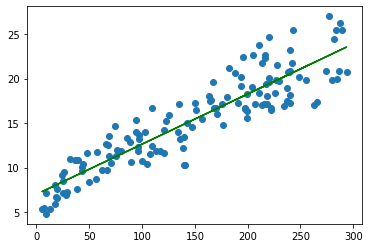

In [27]:
plt.scatter(x_train,y_train)
plt.plot(x_train,7.005274+0.056317*x_train,'g')

# Prediction

In [28]:
val2=sm.add_constant(x_test)

In [29]:
y_predict=rline.predict(val2)

In [30]:
y_predict.head()

95     16.201882
30     23.500598
2       7.973930
43     18.657314
120    14.962902
dtype: float64

In [31]:
np.sqrt(mean_squared_error(y_test,y_predict))

2.630008408533382

In [32]:
r_squared=r2_score(y_test,y_predict)

In [33]:
r_squared

0.7726536379824955

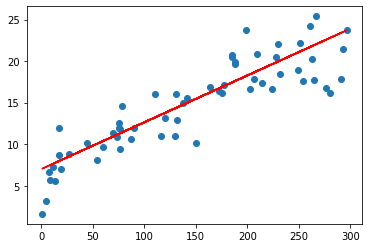

In [34]:
plt.scatter(x_test,y_test)
plt.plot(x_test,7.005274+0.056317*x_test,'r')

In [35]:
res=y_test-y_predict

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


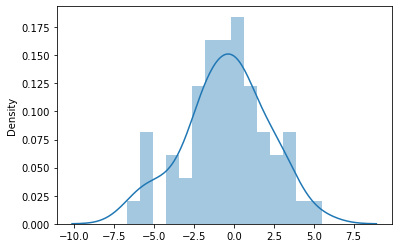

In [36]:
sns.distplot(res,bins=15)